In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Cell Level Performance Plots

In [2]:
test_file = h5py.File('../data/Outfile_CellInformation.h5','r')

## Define the list of algorithms we want to compare

each file contains the prediction for the test dataset given by that particular algorithm

In [14]:
algorithms = [
    ['random_guess', 'algorithm_predictions/randomguess_output.h5'],
    ['CNN','../data/Outfile_CellInformation.h5']
    #'your algorithm', 'path to your prediction'
]

## Extract the target values from the test dataset

In [8]:
target_fractions = {}
target_neutral_energies = {}

for layer_i in range(6):
    total_energy = test_file['RealRes_TotalEnergy_Layer'+str(layer_i+1)][:].flatten()
    total_energy[total_energy < 0] = 0
    neutral_energy = test_file['RealRes_NeutralEnergy_Layer'+str(layer_i+1)][:].flatten()
    neutral_energy[neutral_energy > total_energy] = 0
    target_fractions[layer_i+1] = np.zeros(len(neutral_energy))
    target_fractions[layer_i+1][total_energy > 0] = neutral_energy[total_energy > 0]/total_energy[total_energy > 0]
    target_neutral_energies[layer_i+1] = neutral_energy

## Get the predicted values for each algorithm

In [16]:
algo_predictions = {}

for alg in algorithms:
    print(alg[1])
    algfile = h5py.File(alg[1],'r')
    algo_predictions[alg[0]] = {}
    for layer_i in range(6):
        total_energy = test_file['RealRes_TotalEnergy_Layer'+str(layer_i+1)][:].flatten()
        total_energy[total_energy < 0] = 0
        neutral_energy = algfile['Predicted_NeutralEnergy_Layer'+str(layer_i+1)][:].flatten()
        neutral_energy[neutral_energy > total_energy] = 0
        algo_predictions[alg[0]][layer_i+1] = np.zeros(len(neutral_energy))
        algo_predictions[alg[0]][layer_i+1][total_energy > 0] = neutral_energy[total_energy > 0]/total_energy[total_energy > 0]
    algfile.close()

algorithm_predictions/randomguess_output.h5
../data/Outfile_CellInformation.h5


# Plot the target vs. predicted

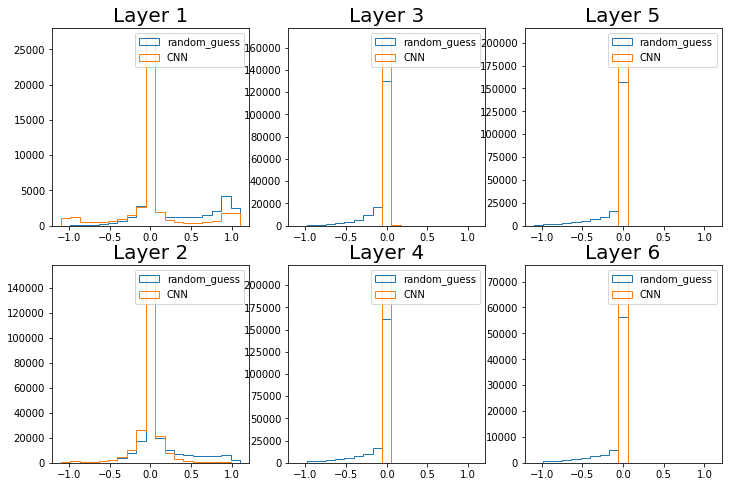

In [21]:
fig, ax = plt.subplots(2,3,figsize=(12,8))

for layer_i in range(6):
    
    ax_i = ax[int(layer_i % 2)][int(layer_i / 2)]
    ax_i.set_title('Layer '+str(layer_i+1),fontsize=20)
    target_frac = target_fractions[layer_i+1]
    total_energy = test_file['RealRes_TotalEnergy_Layer'+str(layer_i+1)][:].flatten()
    
    energy_threshold = 50
    for alg in algorithms:
        pred_fractions =  algo_predictions[alg[0]][layer_i+1]
        
        ax_i.hist( (target_frac-pred_fractions)[total_energy > energy_threshold],
                  bins=np.linspace(-1.1,1.1,20),histtype='step',label=alg[0])
        
        #ax_i.scatter(target_frac[total_energy > 200],pred_fractions[total_energy > 200])
        
    ax_i.legend()

plt.show()